# **Unidad 1 - Propiedades de los Fluidos de Reservorio**

## Contenido

- **Correlaciones para las propiedades PVT del petróleo negro**
    - 1. Correlaciones para el punto de burbuja, $P_b$
    - 2. Correlaciones para la solubilidad del gas, $R_s$
    - 3. Correlaciones para la compresibilidad del petróleo, $C_o$
    - 4. Correlaciones para el factor volumétrico del petróleo, $B_o$
    - 5. Correlaciones para la densidad del petróleo, $\rho_o$
    - 6. Correlaciones para la viscosidad del petróleo, $\mu_o$
        - 6.1 Viscosidad del petróleo crudo, $\mu_od$
        - 6.2 Viscosidad del petróleo saturado, $\mu_ob$
        - 6.3 Viscosidad del petróleo subsaturado, $\mu_o$
        

![separ_test.PNG](Resources/separ_test.PNG)\
*Figure 1. Separator test*

# Import Python Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import plotly_express as px
import math

# **Propiedades de los Fluidos**

## **1. Correlaciones para el punto de burbuja $P_b$**

![PB](Resources/PhaseDiagram.png)\
*Figura 2. Diagrama de Fases*

## *1.1. Correlación de Standing, $P_b$*

En el desarrollo de sus correlaciones, utilizó **105 puntos** de datos determinados experimentalmente sobre 22 mezcas diferentes de petróleo y gas procedentes de California. 

\begin{gathered}
P_b=18.2\left[\left(R_s / \gamma_g\right)^{0.83}(10)^{a-1.4}\right] \\
a=0.00091(T)-0.0125(A P I)
\end{gathered}

**Donde:**

$\checkmark R_s=$ Solubilidad del gas, $s c f / S T B$ :\
$\checkmark \gamma_g=$ Gravedad específica de los gases de superficie\
$\checkmark P_b=$ Presión del punto de burbuja; psia\
$\checkmark T=$ Temperatura del Sistema, $F$

In [2]:
def pb_std(sg, api, T, P, rs=None, pb=None):
    # Coeficiente a
    a = 0.00091 * T - 0.0125 * api
    
    if rs is not None:
        pb = 18.2 * ((rs / sg)**0.83 * (10)**a - 1.4)
    
    else:
        pb = pb
    return pb

## *1.2. Correlación de Vasquez-Beggs, $P_b$*

La correlación se desarrolló a partir de datos obtenidos en más de 600 análisis PVT de laboratorio recogidos en yacimientos de todo el mundo.


$$
\begin{aligned}
P_b & =\left[\left(C 1 \frac{R_s}{\gamma_{g s}}\right)(10)^a\right]^{C 3} \\
a & =C 2\left(\frac{A P I}{T+460}\right)
\end{aligned}
$$
$$
\gamma_{g s}=\gamma_g\left[1+0.5912 *\left(10^{-4}\right)(A P I)\left(T_{\text {sep }}\right) \log \left(\frac{P_{\text {sep }}}{114.7}\right)\right]
$$
**Donde:**

$\checkmark R_S=$ Solubilidad del gas, $scf / STB$\
$\checkmark \gamma_g=$ Gravedad específica promedio de los gases de superficie\
$\checkmark \gamma_{g s}=$ Gravedad específica del gas en el separador\
$\checkmark P_b=$ Presión del punto de burbuja, $psia$\
$\checkmark T=$ Temperatura del Sistema; $F$

In [ ]:
# Write your code here



---

## **2. Correlaciones para la solubilidad del gas $R_s$**

![PB](Resources/Rs_Plot.png)\
*Figura 3. Solubilidad del gas*

## *2.1. Correlación de Velarde, $R_s$*

En el desarrollo de sus correlaciones utilizó $\mathbf{1 0 5}$ puntos de datos determinados experimentalmente sobre 22 mezclas diferentes de petróleo y gas procedentes de California.
$$


\begin{gathered}
R_S=\frac{R_{s r}}{R_{s b}} \quad \quad R_{S r}=\alpha 1 P_r^{\alpha 2}+(1-\alpha 1) P_r{ }^{\alpha 3} \\
P_r=\frac{P-0.101}{P_b} \\
\alpha 1=A_o S G_g{ }^{A 1} Y_{A P I}{ }^{A 2}(1.8 T-459.67)^{A 3} P_b{ }^{A 3} \\
\alpha 2=B_o S G_g{ }^{B 1} Y_{A P I}{ }^{B 2}(1.8 T-459.67)^{B 3} P_b{ }^{B 4} \\
\alpha 3=C_o S G_g{ }^{C 1} Y_{A P I}{ }^{C 2}(1.8 T-459.67)^{C 3} P_b^{C 4}
\end{gathered}
$$

**Donde:**

$\checkmark R_S=$ Solubilidad del gas, $scf / STB$\
$\checkmark \gamma_g=$ Gravedad específica promedio de los gases de superficie\
$\checkmark \gamma_{o}=$ Gravedad específica del petróleo\
$\checkmark P=$ Presión del sistema, $psia$\
$\checkmark P_b=$ Presión del punto de burbuja, $psia$\
$\checkmark P_r=$ Presión reducidad, $psia$\
$\checkmark T=$ Temperatura del Sistema; $F$

In [ ]:
def rs_velarde(sg, api, T, P, rsb, pb=None):
    
    if pb is not None:
        # Presión reducida
        pr = (P - 0.101) / pb
        
        # Solubilidad del gas reducida
        # alpha 1
        al_1 = 1.8653e-4 * sg**1.672608 * api**0.929870 * (1.8 * T - 459.67)**0.247235 * pb**0.247235

        # alpha 2
        al_2 = 0.1004 * sg**-1.00475 * api**0.337711 * (1.8 * T - 459.67)**0.12795 * pb**0.302065

        # alpha 3
        al_3 = 0.9167 * sg**-1.48548 * api**-0.164741 * (1.8 * T - 459.67)**-0.09133 * pb**0.047094

        # Solubilidad del gas reducida
        Rs_r = al_1 * (pr)**al_2 + (1 - al_1) * pr**al_3
        
    else:
        # Presión reducida
        pr = (P - 0.101) / pb_std(sg, api, T, P, rsb)
        
        # Solubilidad del gas reducida
        # alpha 1
        al_1 = 1.8653e-4 * sg**1.672608 * api**0.929870 * (1.8 * T - 459.67)**0.247235 * pb_std(sg, api, T, P, rsb)**0.247235

        # alpha 2
        al_2 = 0.1004 * sg**-1.00475 * api**0.337711 * (1.8 * T - 459.67)**0.12795 * pb_std(sg, api, T, P, rsb)**0.302065

        # alpha 3
        al_3 = 0.9167 * sg**-1.48548 * api**-0.164741 * (1.8 * T - 459.67)**-0.09133 * pb_std(sg, api, T, P, rsb)**0.047094

        # Solubilidad del gas
        Rs_r = al_1 * pr**al_2 + (1 - al_1) * pr**al_3
        
        
    Rs = Rs_r / rsb
    
    return Rs

## *2.2. Correlación de Standing, $R_s$*

En el desarrollo de sus correlaciones utilizó **105 puntos de datos determinados experimentalmente sobre 22 mezclas diferentes de petróleo y gas procedentes de California.**


$$
\begin{aligned}
& R_S=\gamma_g\left[\left(\frac{P}{18.2}+1.4\right) 10^x\right]^{1.2048} \\
& x=0.0125 A P I-0.00091 T
\end{aligned}
$$

**Donde:**

$\checkmark R_S=$ Solubilidad del gas, $scf / STB$\
$\checkmark \gamma_g=$ Gravedad específica del gas en solución\
$\checkmark P=$ Presión del sistema, $psia$\
$\checkmark T=$ Temperatura del Sistema, $F$

*Válida para yacimientos saturado y subsaturado*

In [8]:
def rs_std(sg, api, T, P):
    
    # Coeficiente x
    x = 0.0125 * api - 0.00091 * T
    
    Rs = sg * (((P / 18.2) + 1.4) * 10**x)**1.2048
    
    return Rs

## **Test 1**

Calcular la presión del punto de burbuja utilizando los siguientes datos:

In [3]:
rsb = 1124 #scf/stb
api = 38.982 
sg_gas = 0.65
pr = 4409 #psia
tr = 140 #psia

In [7]:
# Write your code

Pb = pb_std(sg_gas, api, tr, pr, rsb)

print(f"Bubble point pressure is: {Pb:.2f} psia")

Bubble point pressure is: 3843.66 psia


## **Test 2**

Calcular la solubilidad del gas, utilizando la correlación de Velarde y Standing:

In [9]:
pb = 3970
rsb = 1124 #scf/stb
api = 38.982 
sg_gas = 0.65
pr = 4409 #psia
tr = 140 #psia

In [11]:
# Write your code here

rs = rs_std(sg_gas, api, tr, pr)

print(f"Gas solubility is: {rs:.2f} scf/stb")

Gas solubility is: 1324.56 scf/stb


---

## **3. Correlaciones para el Coeficiente de Compresibilidad del Petróleo $C_o$**

![PB](Resources/co.png)\
*Figura 4. Compresibilidad de un fluido*

## *3.1. Correlación de Vasquez-Beggs, $C_o$*

La correlación se desarrolló a partir de $\mathbf{4 0 3 6}$ datos experimentales, generando un modelo de regresión lineal.

$$
\begin{gathered}
C_o=\frac{-1433+5 R_{s b}+17.2 T-1180 \gamma_{g c}+12.61^{\circ} A P I}{10^5 P} \\
\gamma_{g c}=\gamma_g\left[1+\left(5.912 * 10^{-5} \text { API } T_{\text {sep }} \log \left(\frac{P_{\text {sep }}}{114.7}\right)\right)\right]
\end{gathered}
$$

**Donde:**

$\checkmark C_o=$ Coeficiente de compresibilidad isotérmica del petróleo, $psia^{-1}$\
$\checkmark R_{s b}=$ Solubilidad del gas en el punto de burbuja, $scf / STB$\
$\checkmark \gamma_g=$ Gravedad específica del gas\
$\checkmark P=$ Presión arriba de la presión del punto de burbuja, $psia$\
$\checkmark T=$ Temperatura del Sistema, $F$

In [13]:
def co_VasquezBeggs(sg, api, T, P, rsb):
    
    # gravedad específica corregida
    #sg_c = sg * (1 + (5.912E-5 * api * Tsep * np.log10(Psep / 114.7)))
    
    Co = (-1433 + 5 * rsb + 17.2 * T - 1180 * sg + 12.61 * api) / (10E5 * P)
    
    return Co

## *3.2. Correlación de Petrosky-Farshad's, $C_o$*

Propusieron una correlación para determinar la compresibilidad del petróleo para **yacimientos subsaturados.**

$C_{\dot{o}}=1.705 * 10^{-7} R_{S b}{ }^{0.69357} \gamma_{\dot{g}}^{0.1885} A P I^{0.3272} T^{0.6729} P^{-0.5906}$

**Donde:**

$\checkmark C_o=$ Coeficiente de compresibilidad isotérmica del petróleo $psia^{-1}$\
$\checkmark R_{s b}=$ Solubilidad del gas en el punto de burbuia, $scf / STB$\
$\checkmark \gamma_g=$ Gravedad específica del gas\
$\checkmark P=$ Presión arriba de la presión del punto de burbuja, $psia$\
$\checkmark T=$ Temperatura del Sistema, $F$

In [15]:
def co_PetFar(sg, api, T, P, rsb):
    
    Co = 1.705E-7 * (rsb)**0.69357 * (sg)**0.1885 * (api)**0.3272 * (T)**0.6729 * (P)**-0.5906
    
    return Co

## **Test 3**

Calcular el coeficiente de compresibilidad isotérmico del petróleo, utilizando las correlaciones de Petrosky-Farshad's y Vasquez-Beggs

In [16]:
pb = 3970
rsb = 1124 #scf/stb
api = 38.982 
sg_gas = 0.65
pr = 4409 #psia
tr = 140 #psia

In [23]:
# Write your code here

co_v = co_VasquezBeggs(sg_gas, api, tr, pr, rsb)
print(f"Oil compressibility is: {co_v} psia^-1")

Oil compressibility is: 1.433332506237242e-06 psia^-1


In [24]:
co_pe = co_PetFar(sg_gas, api, tr, pr, rsb)
print(f"Oil compressibility is: {co_pe} psia^-1")

Oil compressibility is: 1.3325747304647714e-05 psia^-1


---

## **4. Correlaciones para el Factor Volumétrico del Petróleo $ B_o$**

![Bo](Resources/Bo_plot.png)\
*Figura 5. Factor volumétrico del petróleo*

## *4.1. Correlación de Standing, $B_o$*

En el desarrollo de sus correlaciones **utilizó 105 puntos de datos determinados experimentalmente sobre 22 mezclas diferentes de petróleo y gas procedentes de California.**

**Petróleo Saturado $(P<=P_{b})$**

$$
B_o=0.9759+0.000120\left[R_S\left(\frac{\gamma_g}{\gamma_o}\right)^{0.5}+1.25 T\right]^{1.2}
$$

**Petróleo Subsaturado $(P>P_{b})$**

$$B_{o}=B_{ob}e^{C_{o}(P_{b}-P)}$$

**Donde:**

$\checkmark B_o=$ Factor volumétrico del petróleo, $bbl / STB$\
$\checkmark R_S=$ Solubilidad del gas, $scf / STB$\
$\checkmark \gamma_g=$ Gravedad específica del gas en solución\
$\checkmark \gamma_o=$ Gravedad específica del petróleo a condiciones de tanque\
$\checkmark T=$ Temperatura del Sistema, $F$

In [38]:
def bo_std(sg, api, T, P, rsb):
    
    # sgo
    sgo = 141.5 / (131.5 + api)
    
    # Pb
    pb = pb_std(sg, api, T, P, rsb)
    
    if P <= pb: # Yacimiento saturado
        Bo = 0.9759 + 0.000120 * (rs_std(sg, api, T, P) * (sg / sgo)**0.5 + 1.25 * T)**1.2
        
    else: # Yacimiento subsaturado
        # Factor volumétrico en el punto de burbuja
        Bob = 0.9759 + 0.000120 * (rs_std(sg, api, T, pb) * (sg / sgo)**0.5 + 1.25 * T)**1.2
        
        # Coeficiente de compresbilidad isotérmica del petróleo
        Co = co_PetFar(sg, api, T, P, rsb)

        Bo = Bob * math.e**(Co * (pb - P))
    
    return Bo

## *4.2. Correlación de Glasso, $B_o$*

La correlación se desarrolló a partir de $\mathbf{4 5}$ muestras de petróleo, principalmente de sistemas de hidrocarburos del mar del norte.

**Petróleo Saturado $(P<=P_{b})$**

$$\quad B_o=1.0+10^A$$

$$
A=-6.58511+2.91329 \log B_{o b}{ }^*-0.27683\left(\log B_{o b}{ }^*\right)^2
$$

$$
B_{o b}{ }^*=R_s\left(\frac{\gamma_g}{\gamma_o}\right)^{0.526}+0.968(T)
$$

**Petróleo Subsaturado $(P>P_{b})$**

$$B_{o}=B_{ob}e^{C_{o}(P_{b}-P)}$$


**Donde:**

$\checkmark B_o=$ Facctor volumétrico del petróleo, $bbl / STB$\
$\checkmark R_s=$ solubilidad del gas, $scf / STB$\
$\checkmark \gamma_g=$ Gravedad específica del gas en solución\
$\checkmark \gamma_o=$ Gravedad específica del petróleo a condiciones de tanque\
$\checkmark T=$ Temperatura del Sistema, $F$

## **Test 4**

Programe la correlación de Glasso, para el cáclulo del factor volumétrico del petróleo, $B_{o}$.

In [25]:
# Write your code here

def bo_glasso(sg, api, T, P, rsb):
    
    # gravedad especifica del petroleo
    sg_o = 141.5 / (131.5 + api)
    
    # presion del punto de burbuja
    pb = pb_std(sg, api, T, P, rsb)
    
    if P <= pb: # yacimiento saturado
        Bobb = rs_std(sg, api, T, P) * (sg / sg_o)**0.526 + 0.968 * T
        
        # Coeficiente A
        A = -6.58511 + 2.91329 * np.log10(Bobb) - 0.27683 * np.log10(Bobb)**2
        
        Bo = 1.0 + 10**A
        
    else: # Yacimiento subsaturado
        # Factor volumétrico en el punto de burbuja
        Bob = 0.9759 + 0.000120 * (rs_std(sg, api, T, pb) * (sg / sgo)**0.5 + 1.25 * T)**1.2
        
        # Coeficiente de compresbilidad isotérmica del petróleo
        Co = co_PetFar(sg, api, T, P, rsb)
        
        # Factor volumetrico para petroleo subsaturado
        Bo = Bob * math.e**(Co * (pb - P))
        
    return Bo

## **Test 5**

a) Construya un Dataframe que contenga los valores $R_{s}$, $B_{o}$ y $C_{o}$ en función de la presión del sistema desde el reservorio hasta el tanque en superficie. Utilice los siguientes datos:

b) Grafique estas 3 propiedades PVT en función de la presión

In [26]:
pb = 3970
rsb = 1124 #scf/stb
api = 38.982 
sg_gas = 0.65
pr = 4409 #psia
tr = 140 #psia

### a) Construir Dataframe -> Reporte PVT

In [34]:
# Arreglo de presiones
p_array = np.arange(4410, 15.7, -10)

# Añadir valor de Patm
p_array = np.append(p_array, 14.7)

# Reemplazo por valor de Pr
p_array[0] = 4409

pvt_df = pd.DataFrame()

In [41]:
# LLenado de dataframe
# Columna de presiones
pvt_df["P (psia)"] = p_array

# Columna de temperaturas
pvt_df["T (F)"] = tr
pvt_df

# Columna de solubilidad del gas
pvt_df["Rs (scf/stb)"] = pvt_df["P (psia)"].apply(lambda row: rs_std(sg_gas, api, tr, row))

# Columna de factor volumetrico del petroleo
pvt_df["Bo (rb/stb)"] = pvt_df["P (psia)"].apply(lambda row: bo_std(sg_gas, api, tr, row, rsb))

# Columna del coeficiente de compresibilidad del petroleo
pvt_df["Co (1/psia)"] = pvt_df["P (psia)"].apply(lambda row: co_PetFar(sg_gas, api, tr, row, rsb))
pvt_df

,P (psia),T (F),Rs (scf/stb),Bo (rb/stb),Co (1/psia)
0,4409.0,140,1324.563654,1.540762,0.000013
1,4400.0,140,1321.325502,1.540933,0.000013
2,4390.0,140,1317.729136,1.541124,0.000013
3,4380.0,140,1314.134439,1.541315,0.000013
4,4370.0,140,1310.541411,1.541506,0.000013
...,...,...,...,...,...
436,50.0,140,9.789683,1.038418,0.000188
437,40.0,140,8.249060,1.037862,0.000214
438,30.0,140,6.756042,1.037323,0.000254
439,20.0,140,5.317394,1.036805,0.000323


### b) Plots PVT Properties

In [43]:
# Transformar a arreglos de Numpy a columnas de interes
np_rs = pvt_df["Rs (scf/stb)"].values
np_bo = pvt_df["Bo (rb/stb)"].values
np_co = pvt_df["Co (1/psia)"].values

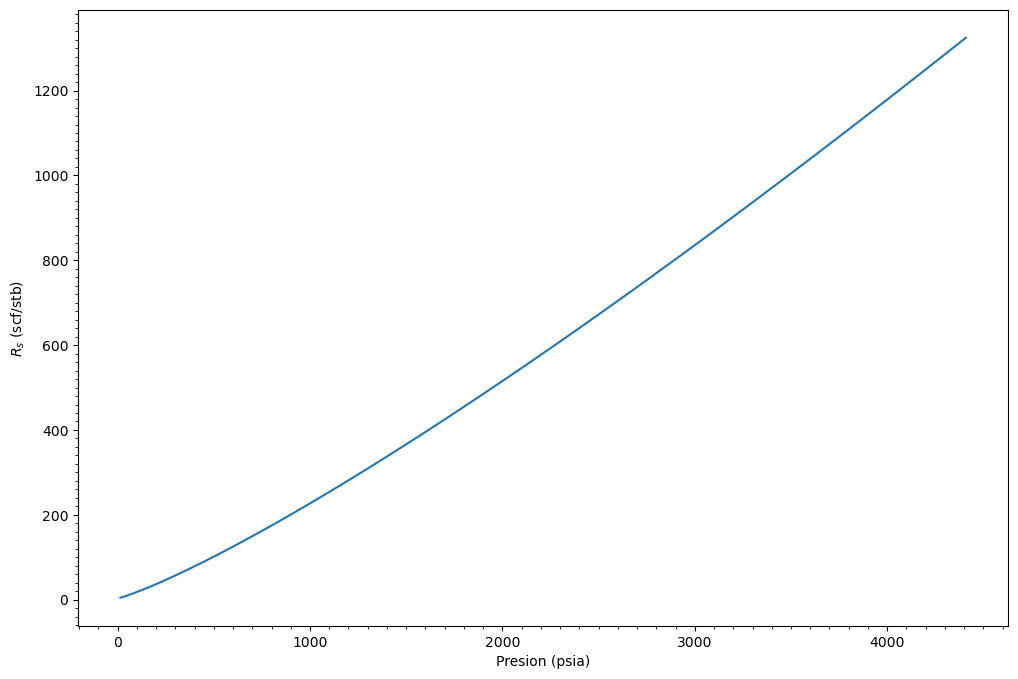

In [64]:
# Rs Vs P

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(p_array, np_rs)

ax.set_xlabel("Presion (psia)")
ax.set_ylabel("$R_{s}$ (scf/stb)")

ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

plt.show()

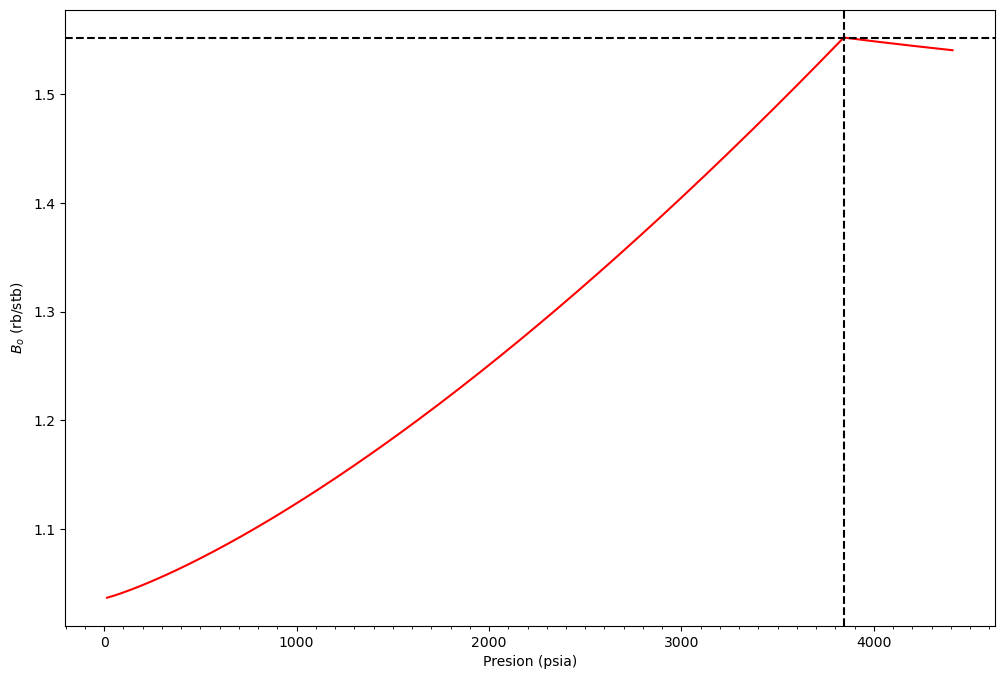

In [76]:
# Bo Vs P
pb = pb_std(sg_gas, api, tr, pr, rsb)
Bob = bo_std(sg_gas, api, tr, pb, rsb)

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(p_array, np_bo, color="red")

ax.set_xlabel("Presion (psia)")
ax.set_ylabel("$B_{o}$ (rb/stb)")

ax.xaxis.set_minor_locator(AutoMinorLocator(10))

ax.axvline(pb, ymax=Bob, ls="--", c="k")
ax.axhline(Bob, xmax=pb, ls="--", c="k")

plt.show()

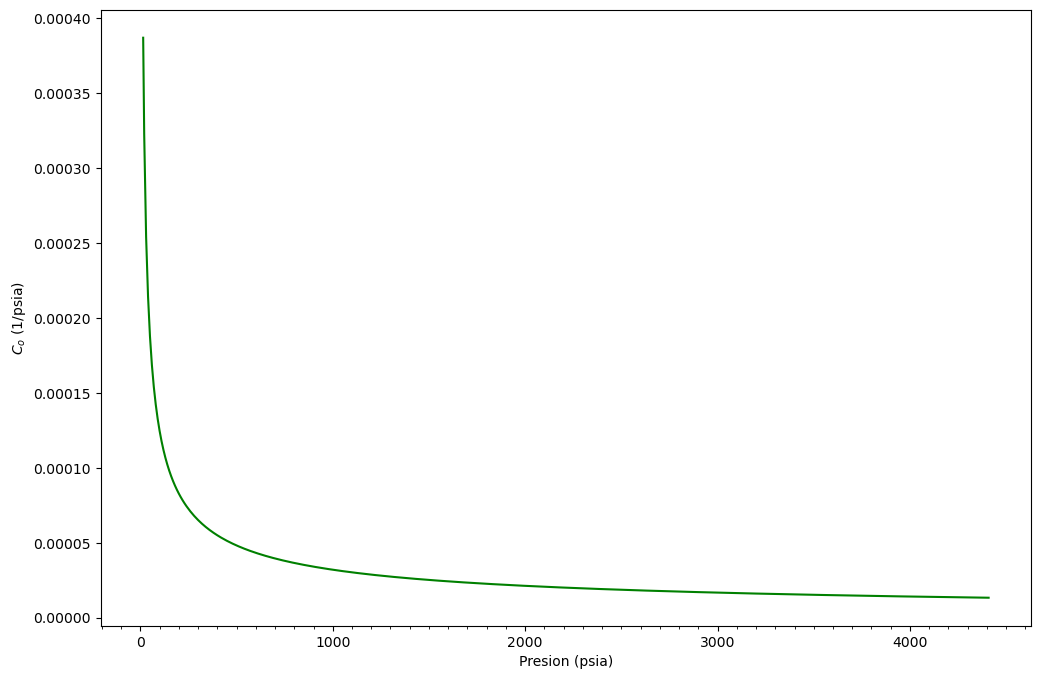

In [66]:
# Co Vs P

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(p_array, np_co, color="green")

ax.set_xlabel("Presion (psia)")
ax.set_ylabel("$C_{o}$ (1/psia)")

ax.xaxis.set_minor_locator(AutoMinorLocator(10))

plt.show()

---

## **5. Correlaciones para la Densidad del Petróleo $\rho_o$**

![density](Resources/rho.gif)\
*figure 6. Oil Density*

## *5.1. Correlación de Standing, $\rho_o$*

En el desarrollo de sus correlaciones utilizó 105 puntos de datos determinados experimentalmente sobre 22 mezclas diferentes de petróleo y gas procedentes de California.

**Petróleo Saturado $(P<=P_{b})$**

$$
\rho_o=\frac{\left(62.4 \gamma_o+0.0136 R_s \gamma_g\right)}{0.972+0.000147\left[R_s\left(\gamma_g / \gamma_o\right)^{0.25}+1.25 T\right]^{1.175}}
$$

**Petróleo Subsaturado $(P>P_{b})$**

$$\rho_{o}=\rho_{ob}e^{C_{o}(P_{b}-P)}$$


**Donde:**

$\checkmark \rho_o=$ Densidad del petróleo, $\mathrm{lb} / ft^3$\
$\checkmark R_s=$ Solubilidad del gas, $scf / STB$\
$\checkmark \gamma_g=$ Gravedad específica del gas\
$\checkmark \gamma_o=$ Gravedad específica del petróleo a condiciones de tanque\
$\checkmark T=$ Temperatura del Sistema, $\mathrm{F}$

## **Test 6**

Programe la correlación de Standing, para el cáclulo de **la densidad del petróleo $\rho_{o}$**, tanto para yacimientos saturados y subsaturados.

In [ ]:
# Write your code here



---

## **6. Correlaciones para la viscosidad del Petróleo $\mu_o$**

![uo](Resources/uo.gif)\
*Figura 7. Viscosidad de fluidos líquidos*

## *6.1. Correlación de Beggs-Robinson, $\mu_{od}$*

Desarrollaron una correlación empírica para determinar la viscosidad del petróleo muerto, a partir del análisis de 460 mediciones de esta propiedad.

$$
\begin{gathered}
\mu_{o d}=10^x-1.0 \\
x=10^{(3.0324-0.02023 A P I) T^{-1.163}}
\end{gathered}
$$

**Donde:**

$\checkmark \mu_{o d}=$ Viscosidad del petróleo muerto, $cp$
$\checkmark T=$ Temperatura, $F$

In [ ]:
# Write your code here


## *6.2. Correlación de Beggs-Robinson, $\mu_{ob}$*

Desarrollaron una correlación empírica para determinar la viscosidad del petróleo saturado, a partir de 2073 mediciones de la viscosidad del petróleo.

$$
\begin{gathered}
\mu_{o b}=a\left(\mu_{o d}\right)^b \\
a=10.715\left(R_s+100\right)^{-0.515} \\
b=5.44\left(R_s+150\right)^{-0.338}
\end{gathered}
$$

**Donde:**

$\checkmark \mu_{o b}=$ Viscosidad del petróleo saturado, $cp$\
$\checkmark R_s=$ Solubilidad del gas; $scf / STB$\
$\checkmark \mu_{o d}=$ Viscosidad del petróleo muerto, $cp$

In [ ]:
# Write your code here



## *6.3. Correlación de Vasquez-Beggs, $\mu_{o}$*

Desarrollaron una expresión matemática para estimar la viscosidad del petróleo subsaturado, a partir de 3593 datos analizados.

$$
\mu_o=\mu_{o b}\left(\frac{P}{P_b}\right)^m
$$

**Donde:**

$\checkmark \mu_o=$ Viscosidad del petróleo, $cp$\
$\checkmark P_b=$ Presión del punto de burbuja, $psia$\
$\checkmark P=$ Presión del sistema, $psia$\
$\checkmark \mu_{ob}=$ Viscosidad del petróleo saturado, $cp$

In [ ]:
# Write your code here

